<a href="https://colab.research.google.com/github/Dulon18/Machine_Learning_project/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRFRegressor
from sklearn import metrics


In [12]:
house_dataset = sklearn.datasets.load_boston() 
print(house_dataset)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [15]:
# Loading the dataset to pandas Dataframe

house_price_dataframe = pd.DataFrame(house_dataset.data,columns=
['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])


In [16]:
print(house_price_dataframe)

        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 rows x 13 columns]


In [17]:
#print first 5 rows of our DataFrame
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [18]:
#add the target (price) column to the dataframe

house_price_dataframe['price'] = house_dataset.target
print(house_price_dataframe)


        CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  price
0    0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1    0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2    0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3    0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4    0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  273.0     21.0  391.99   9.67   22.4
502  0.04527   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   9.08   20.6
503  0.06076   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   5.64   23.9
504  0.10959   0.0  11.93   0.0  0.573  ...  273.0     21.0  393.45   6.48   22.0
505  0.04741   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   7.88   11.9

[506 rows x 14 

In [19]:
# checking the number of rows and columns
house_price_dataframe.shape

(506, 14)

In [21]:
# checking missing values (0 means there are no missing value)
house_price_dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [22]:
# Finding Central Tendency of the dataset
house_price_dataframe.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Two type of Correlation**

1.   Positive
2.   Negative







In [24]:
# understanding the correlation between various feature in the dataset
correlation = house_price_dataframe.corr()

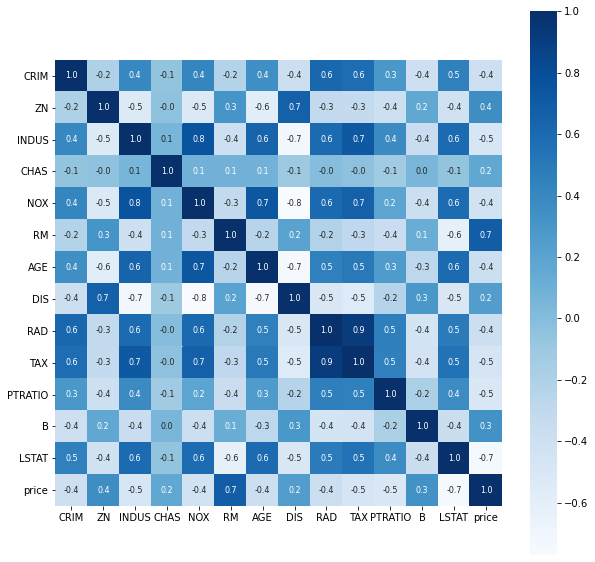

In [27]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',
            annot=True, annot_kws={'size':8},cmap='Blues')

In [28]:
 # Splitting Train & target data
 x=house_price_dataframe.drop(['price'],axis=1)
 y=house_price_dataframe['price']
 print(x,y)

        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 rows x 13 columns] 0      24.0
1  

In [33]:
#taking training & testing data
x_train,x_test,y_train,y_test =train_test_split(x,y,
          test_size=0.2, random_state = 2)

print(x.shape,x_train.shape,x_test.shape)

(506, 13) (404, 13) (102, 13)


In [34]:
# Model Training
# XGBoost Regressor
model = XGBRFRegressor()


In [35]:
# training model with x_train
model.fit(x_train,y_train)

[17:30:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRFRegressor(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
               colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
               max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
               n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=0.8, verbosity=1)

***Evaluation***

In [37]:
# prediction on training data

training_data_prediction = model.predict(x_train)
print(training_data_prediction)


[24.26097   23.937279  20.795095  34.678898  17.572048  14.097384
 20.537981  16.403696  12.070563  20.26593   15.364628  10.941337
 26.76523   29.387794  32.45916   20.57872   23.951025  20.601912
 33.815083  20.506857  24.623003  11.109909  40.909138  20.645123
 17.505491  20.504509  20.822424  27.183193  20.645123  33.550327
 20.683706  11.11836   20.674335  16.958675  12.095911  11.256641
 13.076128  20.767534  17.01101   15.447571  24.259064  30.94419
 14.228413  16.311405  17.086775  16.693718  24.510582  16.900564
 40.909138  19.273033  20.724445  31.855907  16.715927  24.28798
 20.58119   23.934807  20.58119   32.236374  27.75429   32.13063
 20.63986   38.83841   14.931303  10.566486  24.012209  11.514686
 23.501461  17.51859   20.683706  40.909138  38.35905   33.749577
 23.96692   32.826275  24.248508  40.396328  15.01451   19.20232
 23.930414  24.012209  33.132637  23.979893  24.291822  19.456394
 40.701645  19.374865  33.48482   33.749577  10.3852215 23.744871
 16.850208  12

In [45]:
# R squared error
score_1 = metrics.r2_score(y_train,training_data_prediction)
# Mean Absulate Error
score_2 = metrics.mean_absolute_error(y_train,training_data_prediction)
print('R squard error : ',score_1)
print('Mean asolute error : ',score_2)

R squard error :  0.821063060730745
Mean asolute error :  2.640049894257347


Visualizing the actual Prices and predicted prices

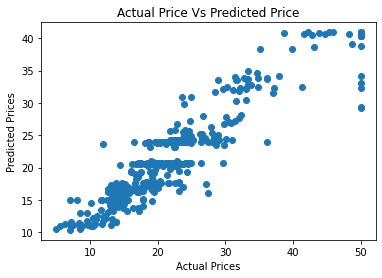

In [49]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price Vs Predicted Price")
plt.show()


**Prediction of test Data**

In [47]:
test_data_prediction = model.predict(x_test)

In [48]:
# R squared error
score_1 = metrics.r2_score(y_test,test_data_prediction)
# Mean Absulate Error
score_2 = metrics.mean_absolute_error(y_test,test_data_prediction)
print('R squard error : ',score_1)
print('Mean asolute error : ',score_2)

R squard error :  0.8517048643795635
Mean asolute error :  2.8000569960650274


**<-----Thank You----->**